In [1]:
import numpy as np
import pandas as pd
from os import path

In [2]:
from sapiens import predict_sequence_embedding

/home/brazdilv/.conda/envs/sapiens/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
DATA_DIR = "../../data/"

In [3]:
chen_data = pd.read_csv(path.join(DATA_DIR, "chen/deduplicated/chen_data.csv"), index_col=0)
chen_data.head(5)

,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0


In [4]:
chen_data_short = chen_data[chen_data["heavy"].str.len() <= 140]
print(len(chen_data_short))
chen_data_short.head()

1562


,Antibody_ID,heavy,light,Y
0,12e8,EVQLQQSGAEVVRSGASVKLSCTASGFNIKDYYIHWVKQRPEKGLE...,DIVMTQSQKFMSTSVGDRVSITCKASQNVGTAVAWYQQKPGQSPKL...,0
1,15c8,EVQLQQSGAELVKPGASVKLSCTASGFNIKDTYMHWVKQKPEQGLE...,DIVLTQSPAIMSASLGERVTMTCTASSSVSSSNLHWYQQKPGSSPK...,0
2,1a0q,EVQLQESDAELVKPGASVKISCKASGYTFTDHVIHWVKQKPEQGLE...,DIELTQSPSSLSASLGGKVTITCKASQDIKKYIGWYQHKPGKQPRL...,1
3,1a14,QVQLQQSGAELVKPGASVRMSCKASGYTFTNYNMYWVKQSPGQGLE...,DIELTQTTSSLSASLGDRVTISCRASQDISNYLNWYQQNPDGTVKL...,0
4,1a2y,QVQLQESGPGLVAPSQSLSITCTVSGFSLTGYGVNWVRQPPGKGLE...,DIVLTQSPASLSASVGETVTITCRASGNIHNYLAWYQQKQGKSPQL...,0


In [11]:
embeddings_heavy = chen_data_short["heavy"].apply(lambda seq: pd.Series(predict_sequence_embedding(seq, chain_type="H", layer=-1)))
embeddings_heavy.insert(0, "Ab_ID", chen_data_short["Antibody_ID"])
embeddings_heavy.columns = embeddings_heavy.columns.astype(str)
embeddings_heavy.reset_index().to_feather(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings_heavy.ftr"))
embeddings_heavy.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,12e8,-0.134161,0.075484,0.377024,0.264288,0.132392,-0.075669,-0.014079,-0.373292,-0.028935,...,-0.164166,-0.214783,0.219017,0.116706,0.342863,-0.431615,-0.507264,-0.019087,-3.023591,-0.093839
1,15c8,-0.188603,0.159150,0.352639,0.196398,0.050981,-0.047057,0.092863,-0.381236,-0.021599,...,-0.188667,-0.176275,0.254127,0.156225,0.332689,-0.358384,-0.558995,0.027430,-3.017720,-0.199350
2,1a0q,-0.216819,0.059556,0.403906,0.228114,0.103585,-0.018792,0.021493,-0.419275,-0.069553,...,-0.223899,-0.217975,0.199577,0.145636,0.311346,-0.396496,-0.562106,0.032565,-3.011448,-0.161791
3,1a14,-0.156908,0.098237,0.386578,0.178501,0.140005,-0.026292,0.077186,-0.382542,-0.069449,...,-0.221107,-0.220329,0.197714,0.146156,0.307048,-0.302835,-0.527889,0.048223,-3.014556,-0.123510
4,1a2y,0.242810,-0.101020,0.334529,-0.154067,0.018751,-0.229859,0.122908,-0.395358,0.087788,...,-0.180359,-0.034657,0.354846,-0.098057,-0.058133,-0.283740,-0.505439,-0.153601,-3.026403,0.025078


In [29]:
embeddings_heavy = pd.read_feather(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings_heavy.ftr"))

In [14]:
embeddings_light = chen_data_short["light"].apply(lambda seq: pd.Series(predict_sequence_embedding(seq, chain_type="L", layer=-1)))
embeddings_light.insert(0, "Ab_ID", chen_data_short["Antibody_ID"])
embeddings_light.columns = embeddings_light.columns.astype(str)
embeddings_light.reset_index().to_feather(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings_light.ftr"))
embeddings_light.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,12e8,0.808958,1.088854,-0.567333,-0.334538,0.703475,-0.399722,-0.977041,-0.004295,-0.449526,...,-0.551750,-0.657874,0.348789,0.660802,0.240210,-1.159543,-0.089259,-0.296646,-0.692070,-0.279281
1,15c8,0.078229,-0.074664,-0.337966,-0.026549,0.200208,0.079838,0.509186,-0.304395,-0.956970,...,0.052712,0.733469,0.215582,0.243388,1.013782,-1.221909,-0.350015,-1.193482,-0.844036,0.096152
2,1a0q,0.964161,1.151425,-1.023632,-0.317854,0.980278,-0.022344,-0.467902,0.201891,-0.360601,...,-0.303439,-0.594165,0.028933,0.760616,0.311758,-1.261243,-0.089060,-0.164134,-0.463464,-0.128049
3,1a14,0.796317,1.315961,-0.776158,-0.459234,0.764244,-0.118532,-0.673978,0.189341,-0.333694,...,-0.458109,-0.684457,0.094104,0.968093,0.299307,-1.249306,-0.307804,-0.359713,-0.618798,-0.211896
4,1a2y,1.072288,1.041111,-0.750684,-0.283682,1.028206,-0.166112,-0.753330,-0.225769,-0.408336,...,-0.505897,-0.374633,0.219703,0.776408,0.592473,-1.179988,-0.285079,-0.164498,-0.650573,-0.127861


In [30]:
embeddings_light = pd.read_feather(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings_light.ftr"))

In [7]:
embeddings = pd.concat([embeddings_heavy, embeddings_light.drop("Ab_ID", axis=1)], axis=1)
embeddings["Y"] = chen_data_short["Y"]
embeddings.head()

,index,Ab_ID,0,1,2,3,4,5,6,7,...,119,120,121,122,123,124,125,126,127,Y
0,0,12e8,-0.134161,0.075484,0.377024,0.264288,0.132392,-0.075669,-0.014079,-0.373292,...,-0.657874,0.348789,0.660802,0.240210,-1.159543,-0.089259,-0.296646,-0.692070,-0.279281,0.0
1,1,15c8,-0.188603,0.159150,0.352639,0.196398,0.050981,-0.047057,0.092863,-0.381236,...,0.733469,0.215582,0.243388,1.013782,-1.221909,-0.350015,-1.193482,-0.844036,0.096152,0.0
2,2,1a0q,-0.216819,0.059556,0.403906,0.228114,0.103585,-0.018792,0.021493,-0.419275,...,-0.594165,0.028933,0.760616,0.311758,-1.261243,-0.089060,-0.164134,-0.463464,-0.128049,1.0
3,3,1a14,-0.156908,0.098237,0.386578,0.178501,0.140005,-0.026292,0.077186,-0.382542,...,-0.684457,0.094104,0.968093,0.299307,-1.249306,-0.307804,-0.359713,-0.618798,-0.211896,0.0
4,4,1a2y,0.242810,-0.101020,0.334529,-0.154067,0.018751,-0.229859,0.122908,-0.395358,...,-0.374633,0.219703,0.776408,0.592473,-1.179988,-0.285079,-0.164498,-0.650573,-0.127861,0.0


In [17]:
embeddings.shape

(1562, 258)

In [22]:
embeddings.to_csv(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings.csv"))

In [28]:
embeddings = pd.read_csv(path.join(DATA_DIR, "chen/embeddings/sapiens/sapiens_chen_embeddings.csv"), index_col=0)
embeddings.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,119.1,120.1,121.1,122.1,123.1,124.1,125.1,126.1,127.1,Y
0,12e8,-0.134161,0.075484,0.377024,0.264288,0.132392,-0.075669,-0.014079,-0.373292,-0.028935,...,-0.657874,0.348789,0.660802,0.240210,-1.159543,-0.089259,-0.296646,-0.692070,-0.279281,0
1,15c8,-0.188603,0.159151,0.352639,0.196398,0.050981,-0.047057,0.092863,-0.381236,-0.021599,...,0.733469,0.215582,0.243388,1.013782,-1.221909,-0.350015,-1.193482,-0.844036,0.096152,0
2,1a0q,-0.216819,0.059556,0.403906,0.228114,0.103585,-0.018792,0.021493,-0.419275,-0.069553,...,-0.594165,0.028933,0.760616,0.311758,-1.261243,-0.089060,-0.164134,-0.463464,-0.128049,1
3,1a14,-0.156908,0.098237,0.386578,0.178501,0.140005,-0.026292,0.077186,-0.382542,-0.069449,...,-0.684457,0.094104,0.968093,0.299307,-1.249306,-0.307804,-0.359713,-0.618798,-0.211896,0
4,1a2y,0.242810,-0.101020,0.334529,-0.154067,0.018751,-0.229859,0.122908,-0.395358,0.087788,...,-0.374633,0.219703,0.776408,0.592473,-1.179988,-0.285079,-0.164498,-0.650573,-0.127861,0


In [8]:
tap_data = pd.read_csv(path.join(DATA_DIR, "tap/TAP_data.csv"))
tap_data.head()

,Antibody_ID,heavy,light,CDR_length,PSH,PPC,PNC,SFvCSP,Y
0,Abagovomab,QVKLQESGAELARPGASVKLSCKASGYTFTNYWMQWVKQRPGQGLD...,DIELTQSPASLSASVGETVTITCQASENIYSYLAWHQQKQGKSPQL...,46,129.7603,0.0000,0.0000,16.32,1
1,Abituzumab,QVQLQQSGGELAKPGASVKVSCKASGYTFSSFWMHWVRQAPGQGLE...,DIQMTQSPSSLSASVGDRVTITCRASQDISNYLAWYQQKPGKAPKL...,45,115.9106,0.0954,0.0421,-3.10,1
2,Abrilumab,QVQLVQSGAEVKKPGASVKVSCKVSGYTLSDLSIHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQQKPGKAPKL...,45,109.6995,0.0000,0.8965,-4.00,1
3,Actoxumab,QVQLVESGGGVVQPGRSLRLSCAASGFSFSNYGMHWVRQAPGKGLE...,DIQMTQSPSSVSASVGDRVTITCRASQGISSWLAWYQHKPGKAPKL...,49,112.6290,0.0000,1.1247,3.10,1
4,Adalimumab,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,DIQMTQSPSSLSASVGDRVTITCRASQGIRNYLAWYQQKPGKAPKL...,48,111.2512,0.0485,1.1364,-19.50,1


In [23]:
embeddings_tap_heavy = tap_data["heavy"].apply(lambda seq: pd.Series(predict_sequence_embedding(seq, chain_type="H", layer=-1)))
embeddings_tap_heavy.insert(0, "Ab_ID", tap_data["Antibody_ID"])
embeddings_tap_heavy.columns = embeddings_tap_heavy.columns.astype(str)
embeddings_tap_heavy.reset_index().to_feather(path.join(DATA_DIR, "tap/embeddings/sapiens/sapiens_tap_embeddings_heavy.ftr"))
embeddings_tap_heavy.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,Abagovomab,-0.090748,0.099529,0.442706,0.176952,0.117761,-0.001945,0.023426,-0.350218,-0.185384,...,-0.304543,-0.303014,0.179557,0.158340,0.222374,-0.346252,-0.618127,0.068855,-3.015994,-0.160553
1,Abituzumab,-0.074267,0.171551,0.474691,0.133427,0.216521,0.047407,-0.020084,-0.492360,-0.133921,...,-0.260721,-0.351977,0.342232,0.259142,0.195779,-0.282967,-0.721450,0.046842,-3.027997,-0.137740
2,Abrilumab,0.119964,-0.059644,0.443711,0.139779,0.575773,0.334234,-0.348093,-0.776167,0.025728,...,-0.272004,-0.536368,0.538689,0.401997,0.013103,-0.339222,-0.609324,-0.086604,-3.084237,-0.146785
3,Actoxumab,0.000611,-0.089507,0.338677,0.083151,0.200531,0.330401,-0.253224,-0.555152,-0.189456,...,-0.496267,-0.429902,0.370794,0.119734,-0.030236,-0.090716,-0.469591,0.131944,-3.053880,0.034487
4,Adalimumab,0.230531,-0.000938,0.238706,-0.071658,0.297986,0.500569,-0.130903,-0.580121,-0.344312,...,-0.625412,-0.561360,0.353774,0.032582,-0.072314,-0.248788,-0.486298,0.024593,-3.068490,-0.105447


In [24]:
embeddings_tap_light = tap_data["light"].apply(lambda seq: pd.Series(predict_sequence_embedding(seq, chain_type="L", layer=-1)))
embeddings_tap_light.insert(0, "Ab_ID", tap_data["Antibody_ID"])
embeddings_tap_light.columns = embeddings_tap_light.columns.astype(str)
embeddings_tap_light.reset_index().to_feather(path.join(DATA_DIR, "tap/embeddings/sapiens/sapiens_tap_embeddings_light.ftr"))
embeddings_tap_light.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,Abagovomab,1.142123,1.069157,-0.683219,-0.289333,0.889622,-0.134606,-0.696678,-0.233151,-0.399310,...,-0.620560,-0.482742,0.217774,0.850484,0.649386,-1.274149,-0.279191,-0.268616,-0.737053,-0.196778
1,Abituzumab,0.796010,1.496302,-0.283782,-0.511480,0.934443,-0.216424,-0.880465,0.733545,-0.637128,...,-0.747846,-0.788665,-0.007604,0.722280,0.053256,-1.161701,-0.103081,-0.842254,-0.743219,-0.017302
2,Abrilumab,0.840626,1.401322,-0.003472,-0.581239,1.136089,-0.193191,-1.041212,0.726001,-0.746846,...,-0.602528,-0.751126,0.074466,0.664460,0.072910,-1.229350,-0.027697,-1.512877,-0.822899,0.290256
3,Actoxumab,0.683078,1.507065,0.076377,-0.710598,1.267513,-0.129622,-1.113286,0.916751,-0.773920,...,-0.620141,-0.764126,-0.023048,0.572022,-0.070313,-1.173917,0.022668,-1.612663,-0.839945,0.370874
4,Adalimumab,0.594101,1.406836,-0.225216,-0.470712,1.277485,-0.338171,-1.117343,1.009166,-0.635622,...,-0.594686,-0.816617,-0.204169,0.574035,-0.107883,-1.014039,0.043726,-0.813334,-0.568057,0.043446


In [26]:
embeddings_tap = pd.concat([embeddings_tap_heavy, embeddings_tap_light.drop('Ab_ID', axis=1)], axis=1)
embeddings_tap["Y"] = tap_data["Y"]
embeddings_tap.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,119,120,121,122,123,124,125,126,127,Y
0,Abagovomab,-0.090748,0.099529,0.442706,0.176952,0.117761,-0.001945,0.023426,-0.350218,-0.185384,...,-0.482742,0.217774,0.850484,0.649386,-1.274149,-0.279191,-0.268616,-0.737053,-0.196778,1
1,Abituzumab,-0.074267,0.171551,0.474691,0.133427,0.216521,0.047407,-0.020084,-0.492360,-0.133921,...,-0.788665,-0.007604,0.722280,0.053256,-1.161701,-0.103081,-0.842254,-0.743219,-0.017302,1
2,Abrilumab,0.119964,-0.059644,0.443711,0.139779,0.575773,0.334234,-0.348093,-0.776167,0.025728,...,-0.751126,0.074466,0.664460,0.072910,-1.229350,-0.027697,-1.512877,-0.822899,0.290256,1
3,Actoxumab,0.000611,-0.089507,0.338677,0.083151,0.200531,0.330401,-0.253224,-0.555152,-0.189456,...,-0.764126,-0.023048,0.572022,-0.070313,-1.173917,0.022668,-1.612663,-0.839945,0.370874,1
4,Adalimumab,0.230531,-0.000938,0.238706,-0.071658,0.297986,0.500569,-0.130903,-0.580121,-0.344312,...,-0.816617,-0.204169,0.574035,-0.107883,-1.014039,0.043726,-0.813334,-0.568057,0.043446,1


In [27]:
embeddings_tap.to_csv(path.join(DATA_DIR, "tap/embeddings/sapiens/sapiens_tap_embeddings.csv"))

In [12]:
embeddings_tap = pd.read_csv(path.join(DATA_DIR, "tap/embeddings/sapiens/sapiens_tap_embeddings.csv"), index_col=0)

In [10]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
def calculate_tsne(
    x, components, perplexity, n_iter=300
):
    tsne = TSNE(
        n_components=components, 
        perplexity=perplexity, n_iter=n_iter,
        init="pca"#, learning_rate="auto"
    )
    X_embedded = tsne.fit_transform(x)
    
    return X_embedded
    

In [15]:
def plot_transformed(x_pc, y, comp_to_plot=[0,1], title=None, palette=['#1f76b4','orange'], name=None):
    df = pd.DataFrame()
    df['x'] = x_pc[:,comp_to_plot[0]]
    df['y'] = x_pc[:,comp_to_plot[1]]
    df["label"] = y
    plt.figure(figsize=(16,10))
    sns.scatterplot(
        x="x", y="y",
        hue="label",
        data=df,
        #legend="full",
        alpha=0.6,
        palette=palette
    )
    if title:
        plt.title(title, fontsize=20)
    if name:
        plt.savefig(path.join(DATA_DIR, name))
    plt.show()

In [18]:
sabdab = pd.read_csv(path.join(DATA_DIR, "sabdab_summary_filtered.tsv"), sep="\t")
sabdab.head()

,pdb,Hchain,Lchain,model,antigen_chain,antigen_type,antigen_het_name,antigen_name,short_header,date,...,light_subclass,light_ctype,affinity,delta_g,affinity_method,temperature,pmid,HLchain,Hchain_fa,Lchain_fa
0,6igu,H,L,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,2019-10-09,...,IGKV1,Kappa,None,None,None,None,None,HL,6igu_H_VH.fa,6igu_L_VL.fa
1,6u1t,H,L,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,2019-10-09,...,IGKV12,Kappa,None,None,None,None,None,HL,6u1t_H_VH.fa,6u1t_L_VL.fa
2,4o51,B,A,0,N,peptide,NaN,ides hinge peptide,IMMUNE SYSTEM,2014-03-26,...,IGKV1,Kappa,None,None,None,None,None,BA,4o51_B_VH.fa,4o51_A_VL.fa
3,5w08,K,L,0,C,protein,NaN,hemagglutinin ha1,VIRAL PROTEIN/IMMUNE SYSTEM,2018-02-14,...,IGLV2,Lambda,None,None,None,None,None,KL,5w08_K_VH.fa,5w08_L_VL.fa
4,5i1e,H,L,0,NaN,NaN,NaN,NaN,IMMUNE SYSTEM,2016-06-08,...,IGKV1,Kappa,None,None,None,None,None,HL,5i1e_H_VH.fa,5i1e_L_VL.fa


In [31]:
embeddings = embeddings.merge(sabdab[["pdb", "heavy_subclass", "light_subclass"]], left_on="Ab_ID", right_on="pdb").drop("pdb", axis=1)
embeddings_heavy = embeddings_heavy.merge(sabdab[["pdb", "heavy_subclass", "light_subclass"]], left_on="Ab_ID", right_on="pdb").drop("pdb", axis=1)
embeddings.head()

,Ab_ID,0,1,2,3,4,5,6,7,8,...,121.1,122.1,123.1,124.1,125.1,126.1,127.1,Y,heavy_subclass,light_subclass
0,12e8,-0.134161,0.075484,0.377024,0.264288,0.132392,-0.075669,-0.014079,-0.373292,-0.028935,...,0.660802,0.240210,-1.159543,-0.089259,-0.296646,-0.692070,-0.279281,0,IGHV14,IGKV6
1,12e8,-0.134161,0.075484,0.377024,0.264288,0.132392,-0.075669,-0.014079,-0.373292,-0.028935,...,0.660802,0.240210,-1.159543,-0.089259,-0.296646,-0.692070,-0.279281,0,IGHV14,IGKV6
2,15c8,-0.188603,0.159151,0.352639,0.196398,0.050981,-0.047057,0.092863,-0.381236,-0.021599,...,0.243388,1.013782,-1.221909,-0.350015,-1.193482,-0.844036,0.096152,0,IGHV14,IGKV4
3,1a0q,-0.216819,0.059556,0.403906,0.228114,0.103585,-0.018792,0.021493,-0.419275,-0.069553,...,0.760616,0.311758,-1.261243,-0.089060,-0.164134,-0.463464,-0.128049,1,IGHV1,IGKV19
4,1a14,-0.156908,0.098237,0.386578,0.178501,0.140005,-0.026292,0.077186,-0.382542,-0.069449,...,0.968093,0.299307,-1.249306,-0.307804,-0.359713,-0.618798,-0.211896,0,IGHV1,IGKV10


In [40]:
tsne_tr = calculate_tsne(embeddings.drop(["Y", "Ab_ID", "heavy_subclass", "light_subclass"], axis=1), components=3, perplexity=8)

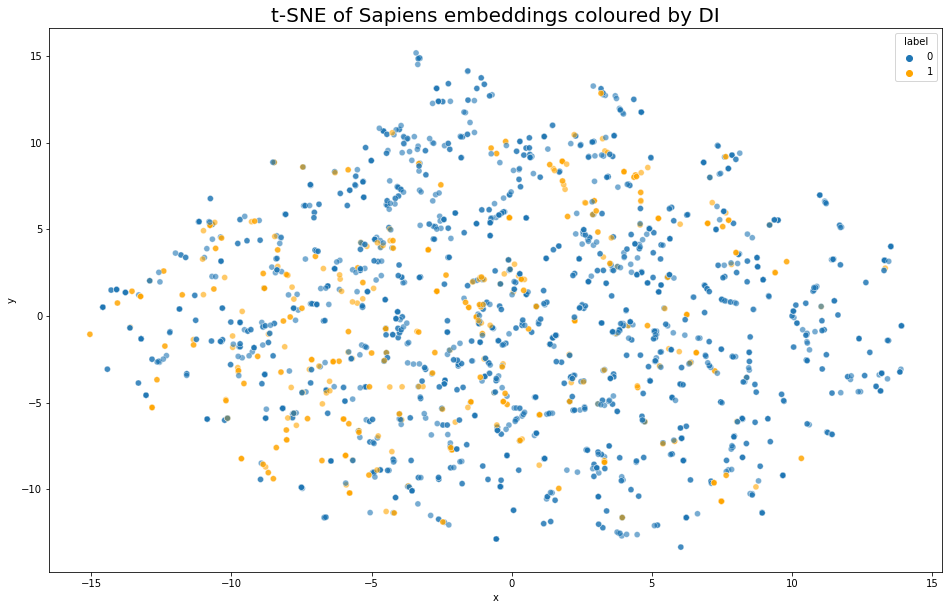

In [41]:
plot_transformed(tsne_tr, embeddings["Y"], [0, 1], "t-SNE of Sapiens embeddings coloured by DI", name="images/tsne_sapiens_last.png")

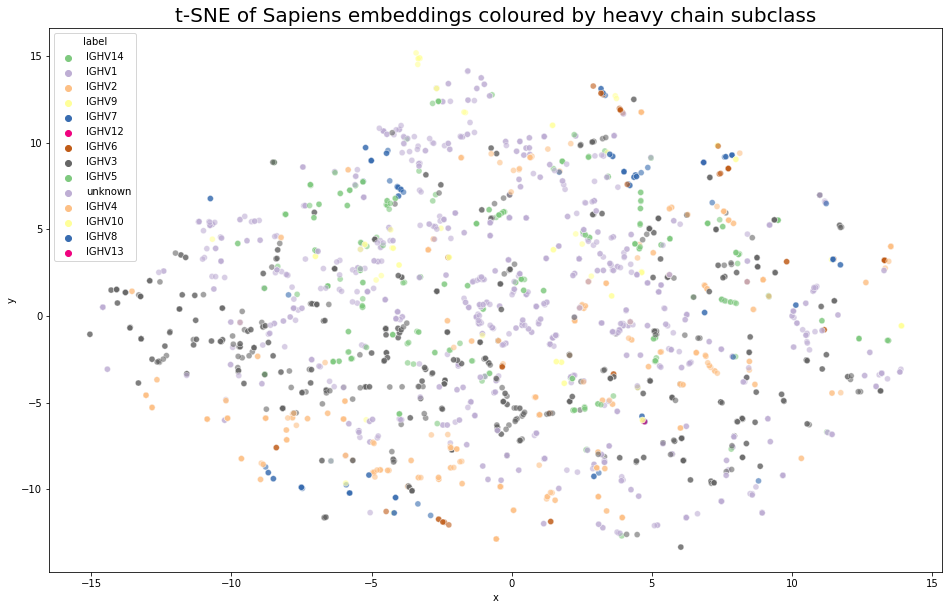

In [42]:
plot_transformed(tsne_tr, embeddings_heavy["heavy_subclass"], [0, 1], "t-SNE of Sapiens embeddings coloured by heavy chain subclass", palette="Accent", name="images/tsne_sapiens_last_by_subclass.png")

In [43]:
tsne_tr = calculate_tsne(embeddings.drop(["Y", "Ab_ID", "heavy_subclass", "light_subclass"], axis=1), components=3, perplexity=30)

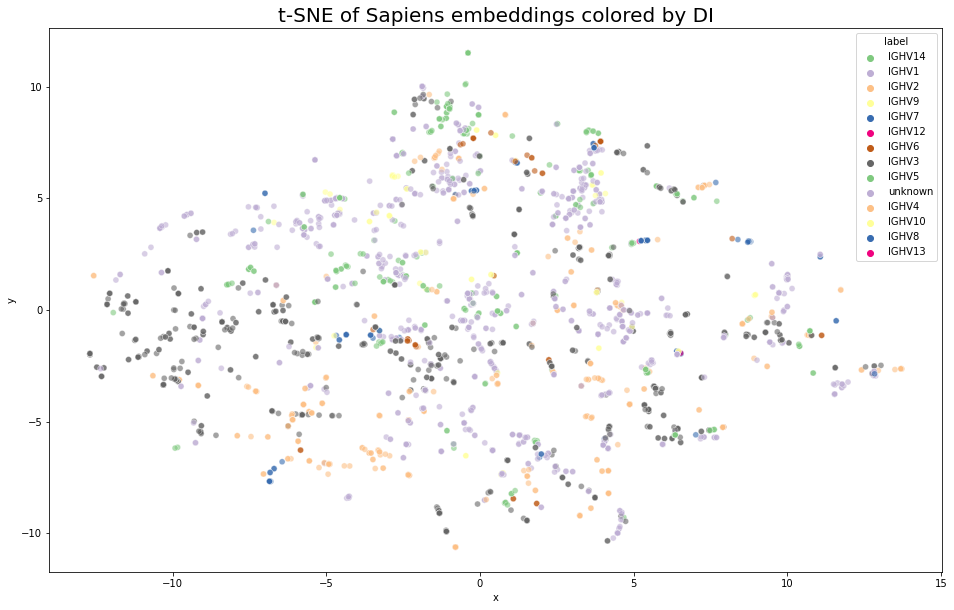

In [44]:
plot_transformed(tsne_tr, embeddings["heavy_subclass"], [0, 1], "t-SNE of Sapiens embeddings colored by DI", palette="Accent")

In [45]:
tsne_tr = calculate_tsne(embeddings_heavy.drop(["Ab_ID", "heavy_subclass", "light_subclass"], axis=1), components=3, perplexity=8)

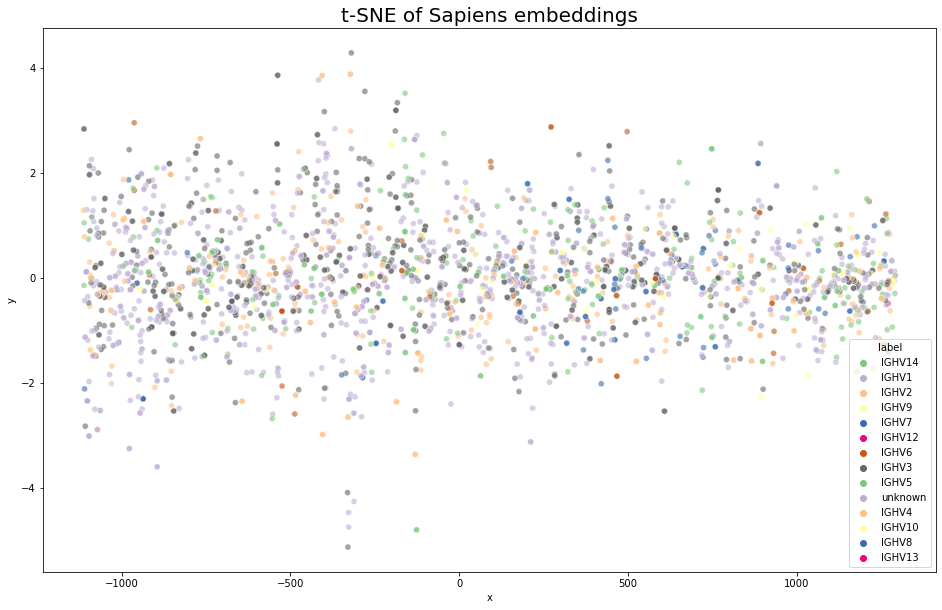

In [46]:
plot_transformed(tsne_tr, embeddings_heavy["heavy_subclass"], [0, 1], "t-SNE of Sapiens embeddings", palette="Accent")

In [20]:
tsne_tr = calculate_tsne(embeddings_heavy.drop(["Ab_ID", "heavy_subclass", "light_subclass"], axis=1), components=3, perplexity=30)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1559 samples in 0.001s...
[t-SNE] Computed neighbors for 1559 samples in 0.106s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1559
[t-SNE] Computed conditional probabilities for sample 1559 / 1559
[t-SNE] Mean sigma: 0.363665
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.146633
[t-SNE] KL divergence after 300 iterations: 0.543845


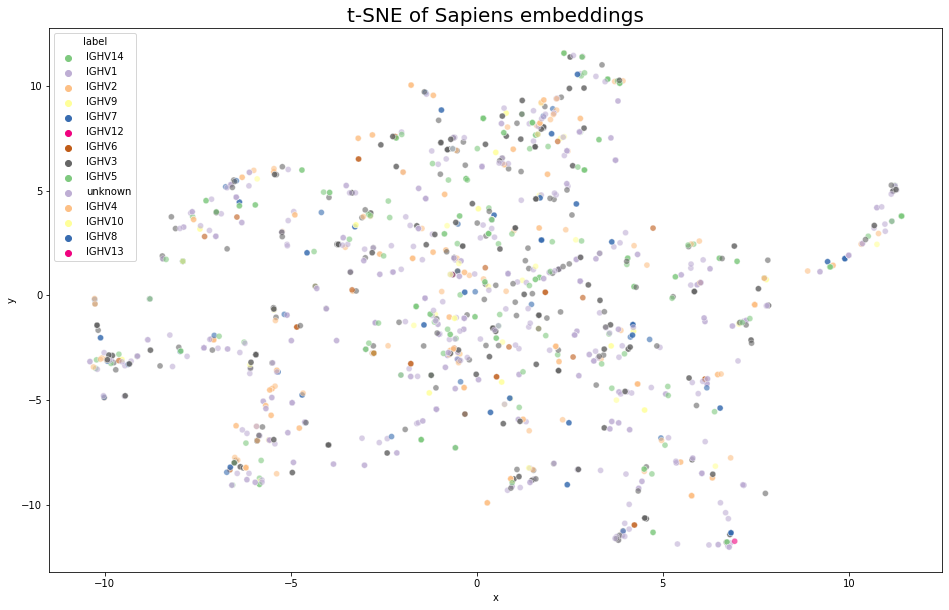

In [23]:
plot_transformed(tsne_tr, embeddings_heavy["heavy_subclass"], [0, 1], "t-SNE of Sapiens embeddings", palette="Accent")

In [29]:
tsne_tr = calculate_tsne(embeddings_heavy.drop(["Ab_ID", "heavy_subclass", "light_subclass"], axis=1), components=3, perplexity=17)

[t-SNE] Computing 52 nearest neighbors...
[t-SNE] Indexed 1559 samples in 0.001s...
[t-SNE] Computed neighbors for 1559 samples in 0.128s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1559
[t-SNE] Computed conditional probabilities for sample 1559 / 1559
[t-SNE] Mean sigma: 0.305057
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.337482
[t-SNE] KL divergence after 300 iterations: 0.646287


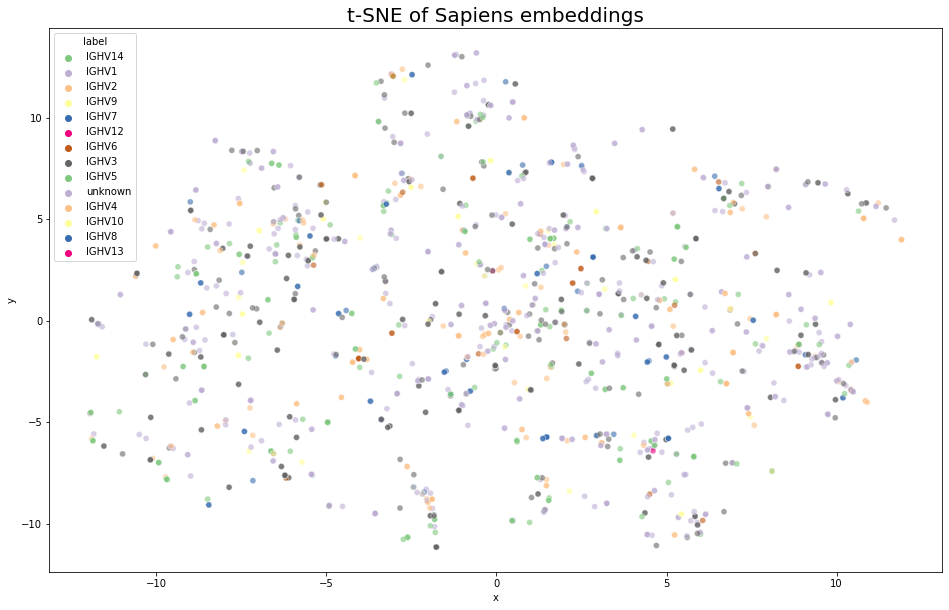

In [30]:
plot_transformed(tsne_tr, embeddings_heavy["heavy_subclass"], [0, 1], "t-SNE of Sapiens embeddings", palette="Accent")